In [ ]:
# Handwriting number classification
# Datsets - MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

In [ ]:
# If we want to have plots within the code 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# In this line we are splitting the data into train and test data 
x_train, x_test = x[0:60000], x[60000:69999]
y_train, y_test = y[0:60000], y[60000:69999]

In [ ]:
# We are using Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1, solver='lbfgs')
clf.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
# In This line we are uploding a img 
from google.colab import files
uploaded = files.upload()

Saving Webp.net-resizeimage.jpg to Webp.net-resizeimage.jpg


array(['3'], dtype=object)

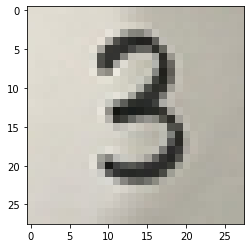

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# In this line we are changing the dictionary into a list
file_name = list(uploaded.keys())[0] 
# In this line we are opening a img file
uploaded_image = Image.open(file_name)
# In this line we are changing the img into 28 X 28 pixels
smaller_image = uploaded_image.thumbnail((28, 28))
# In this line we are saving the file with a different name
uploaded_image.save("smaller_"+file_name)

# In this line we are coverting the RGB (any other type img) img into Grayscale img
img_grey = cv2.imread("smaller_"+file_name, cv2.IMREAD_GRAYSCALE)

# To ignore the gray colour in the img we are changing it into black or white colour
# if the pixel is grater than 128 then it will covert into 255
img_binary = cv2.threshold(img_grey, 128, 255, cv2.THRESH_BINARY)[1]

# In this line we are joining all the small lists (rows) into one big list (entire img)
img_binary_flatten = img_binary.flatten()

# In this line we are inverting the binary value of the img 
# Eg : 1, 0, 1, 0, into  0, 1, 0, 1,
img_binary_invert = np.invert(img_binary_flatten)

# In this line we are ploting the img
plt.imshow(uploaded_image, cmap=matplotlib.cm.binary)

# In this line we are predicting our model
clf.predict([img_binary_invert])

In [ ]:
from sklearn import metrics
# In this line we are using confusion matrix to see the performance of our model
y_pred = clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  909,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]])

Accuracy: 92.54925492549255


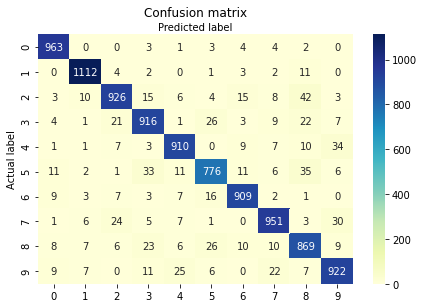

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat map
# To visualize the accuracy of our model we are using heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)